In [390]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from scipy.stats import skew
from scipy.stats import pearsonr, spearmanr, f_oneway, kruskal, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
# Set visual style
sns.set(style="whitegrid")
plt.style.use("ggplot")


In [332]:
# Load Dataset
df = pd.read_csv("C:/Users/wguti/OneDrive/Documentos/Projects/ice_coffee_python/iced_coffee_data.csv")


In [333]:
# Overview
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)


   record_id coffee_type    milk_type flavor_additions packaging_type  \
0          1     Arabica  Plant-based              NaN        Plastic   
1          2     Robusta        Whole            Mocha          Paper   
2          3     Arabica         Skim              NaN          Paper   
3          4       Blend         Skim          Vanilla          Glass   
4          4       Blend         Skim          Vanilla          Glass   

  serving_size texture_level  bitterness_level  sugar_pct  foam_thickness  \
0       Medium        Smooth          0.349495   0.738285        0.383326   
1       Medium        Smooth          0.926313   0.454813        0.532906   
2       Medium          Thin          0.408757   0.579127        0.257328   
3        Small        Creamy          0.734636   0.391505        0.293451   
4        Small        Creamy          0.734636   0.391505        0.293451   

   caffeine_strength  price  discount_pct  aftertaste  aroma_strength  \
0           0.534360   3.

In [334]:
# data cleaning
print(df.isna().sum())

record_id               0
coffee_type             0
milk_type               0
flavor_additions     5098
packaging_type          0
serving_size            0
texture_level           0
bitterness_level     1170
sugar_pct             161
foam_thickness        193
caffeine_strength     217
price                 226
discount_pct          325
aftertaste            133
aroma_strength        221
satisfaction         1114
churn_rate           1493
record_timestamp        0
buy_again            1684
dtype: int64


In [335]:
# verify duplicates
num_duplicates = df.duplicated().sum()
print(f'number of duplicated rows: {num_duplicates}')

number of duplicated rows: 0


In [336]:
# show duplicated rows
duplicates = df[df.duplicated()]
print(duplicates.head())

Empty DataFrame
Columns: [record_id, coffee_type, milk_type, flavor_additions, packaging_type, serving_size, texture_level, bitterness_level, sugar_pct, foam_thickness, caffeine_strength, price, discount_pct, aftertaste, aroma_strength, satisfaction, churn_rate, record_timestamp, buy_again]
Index: []


In [337]:
df['flavor_additions'].unique()
df['flavor_additions'].value_counts(dropna=False)



flavor_additions
NaN         5098
Vanilla     3440
Caramel     3401
Hazelnut    2427
Mocha       2359
Name: count, dtype: int64

let's start cleaning Na values of each column, in this case, we hace 12 variables where we must to go throght each on them. besides, I will clone the data frame for keeping the original dataframe

In [338]:
df_clean = df.copy()

In [339]:
# flavor_additions 
# quantity of unique values and NaN
print('NaN values: ', df_clean['flavor_additions'].isnull().sum)
print('\n Unique values')
print(df_clean['flavor_additions'].value_counts(dropna=False))

NaN values:  <bound method Series.sum of 0         True
1        False
2         True
3        False
4        False
         ...  
16720    False
16721    False
16722    False
16723    False
16724    False
Name: flavor_additions, Length: 16725, dtype: bool>

 Unique values
flavor_additions
NaN         5098
Vanilla     3440
Caramel     3401
Hazelnut    2427
Mocha       2359
Name: count, dtype: int64


In [340]:
# NaN values = 5098
# Unique values:
# Vanilla       3000
# Caramel       2500
# Hazelnut      1800
# Chocolate     1400
# NaN           5098
# in summary NaN values mean 'without flavor additions or an type error'
# so, in this case we will replace NaN values with 'No flavor' 

In [341]:
df_clean['flavor_additions'].fillna('No flavor', inplace=True)

C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\4281698741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['flavor_additions'].fillna('No flavor', inplace=True)


In [342]:
print('Values NaN in flavor_additions: ', df['flavor_additions'].isnull())

Values NaN in flavor_additions:  0         True
1        False
2         True
3        False
4        False
         ...  
16720    False
16721    False
16722    False
16723    False
16724    False
Name: flavor_additions, Length: 16725, dtype: bool


# bitterness_level 

In [343]:
print('NaN values in bitterness_level:' , df_clean['bitterness_level'].isnull().sum())

NaN values in bitterness_level: 1170


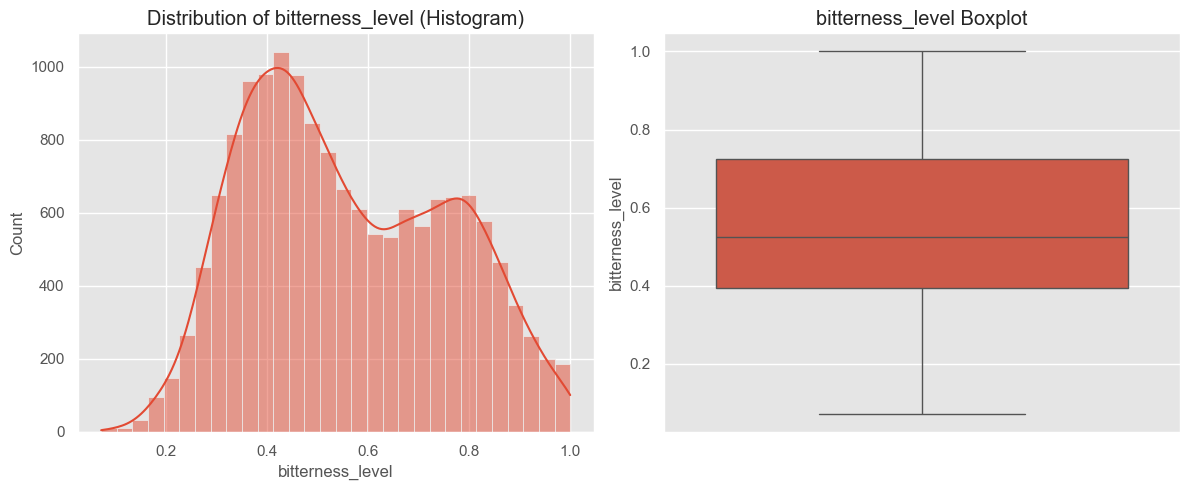

In [344]:
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['bitterness_level'], kde=True, bins=30)
plt.title('Distribution of bitterness_level (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['bitterness_level'])
plt.title('bitterness_level Boxplot')

plt.tight_layout()
plt.show()

In [345]:
# let's calculate skewed
sk_bitterness = skew (df_clean['bitterness_level'], nan_policy='omit')
print(f"Skewed bitterness_level: {sk_bitterness:.4f}")

Skewed bitterness_level: 0.2697


In [346]:
# its distribution is skewed, and according to this variables which is cuantitative
# i will changes those values to MEDIAN
df_clean['bitterness_level'].fillna(df_clean['bitterness_level'].median(), inplace=True)
print("NaN values after of imputation:", df_clean['bitterness_level'].isnull().sum())

NaN values after of imputation: 0


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\976132720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bitterness_level'].fillna(df_clean['bitterness_level'].median(), inplace=True)


# sugar_pct

NaN values in sugar_pct: 161


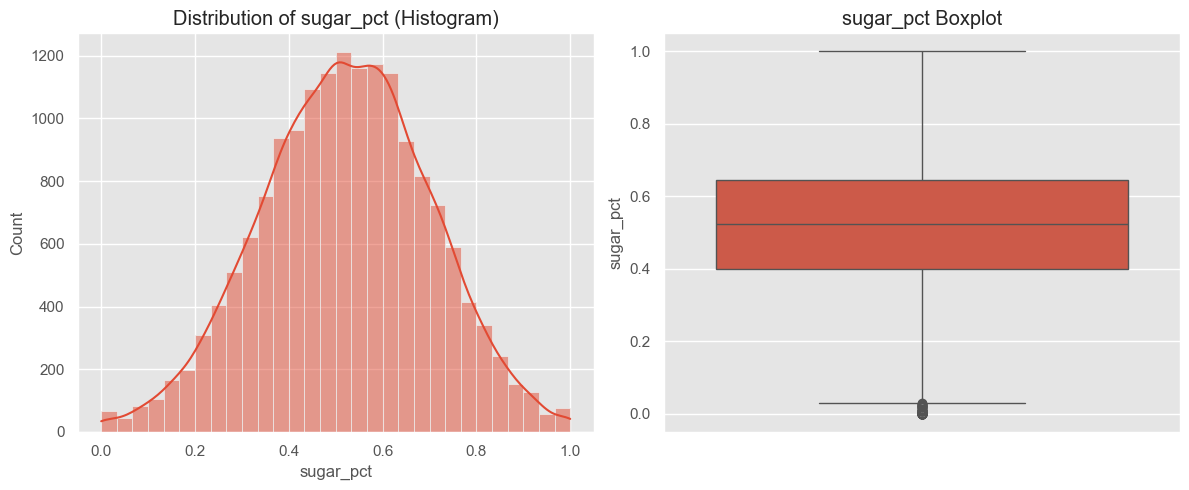

Skewed sugar_pct: -0.0861


In [347]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in sugar_pct:' , df_clean['sugar_pct'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['sugar_pct'], kde=True, bins=30)
plt.title('Distribution of sugar_pct (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['sugar_pct'])
plt.title('sugar_pct Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['sugar_pct'], nan_policy='omit')
print(f"Skewed sugar_pct: {sk_bitterness:.4f}")

In [348]:
# in this case is safety use Mean in NaN values
df_clean['sugar_pct'].fillna(df_clean['sugar_pct'].mean(), inplace=True)
# Verify
print("Na values in sugar_pct:", df_clean['sugar_pct'].isnull().sum())

# Verify that mean do not change drastically
print("Maean after imputation:", df_clean['sugar_pct'].mean())

Na values in sugar_pct: 0
Maean after imputation: 0.5211673394962346


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\2175464393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['sugar_pct'].fillna(df_clean['sugar_pct'].mean(), inplace=True)


# foam_thickness

NaN values in foam_thickness: 193


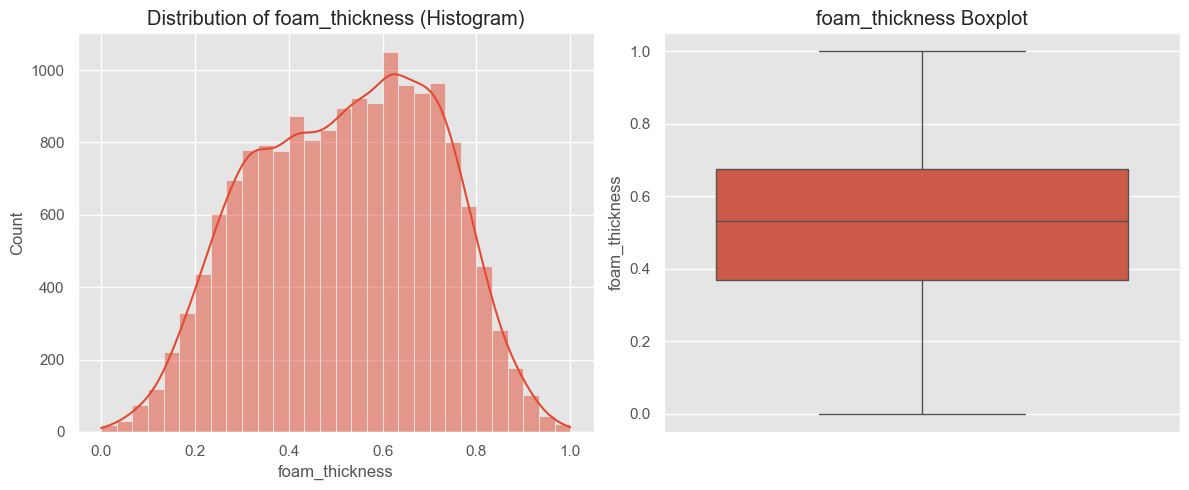

Skewed foam_thickness: -0.1275


In [349]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in foam_thickness:' , df_clean['foam_thickness'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['foam_thickness'], kde=True, bins=30)
plt.title('Distribution of foam_thickness (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['foam_thickness'])
plt.title('foam_thickness Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['foam_thickness'], nan_policy='omit')
print(f"Skewed foam_thickness: {sk_bitterness:.4f}")

In [350]:
# in this case is safety use Mean in NaN values
df_clean['foam_thickness'].fillna(df_clean['foam_thickness'].mean(), inplace=True)
# Verify
print("Na values in foam_thickness:", df_clean['foam_thickness'].isnull().sum())

# Verify that mean do not change drastically
print("Maean after imputation:", df_clean['foam_thickness'].mean())

Na values in foam_thickness: 0
Maean after imputation: 0.5219447631260519


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\3215857500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['foam_thickness'].fillna(df_clean['foam_thickness'].mean(), inplace=True)


# caffeine_strength

NaN values in caffeine_strength: 217


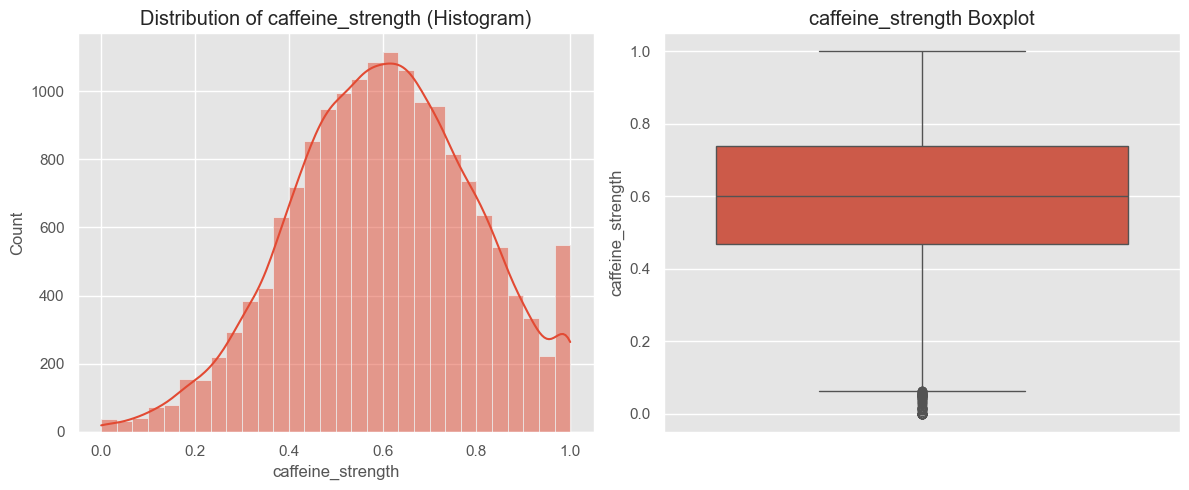

Skewed caffeine_strength: -0.1441


In [351]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in caffeine_strength:' , df_clean['caffeine_strength'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['caffeine_strength'], kde=True, bins=30)
plt.title('Distribution of caffeine_strength (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['caffeine_strength'])
plt.title('caffeine_strength Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['caffeine_strength'], nan_policy='omit')
print(f"Skewed caffeine_strength: {sk_bitterness:.4f}")

In [352]:
# Impute with mean since skew is low
df_clean['caffeine_strength'].fillna(df_clean['caffeine_strength'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in caffeine_strength:", df_clean['caffeine_strength'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['caffeine_strength'].mean())

Missing values in caffeine_strength: 0
Mean after imputation: 0.6006245761334574


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\397934089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['caffeine_strength'].fillna(df_clean['caffeine_strength'].mean(), inplace=True)


# price 

NaN values in price: 226


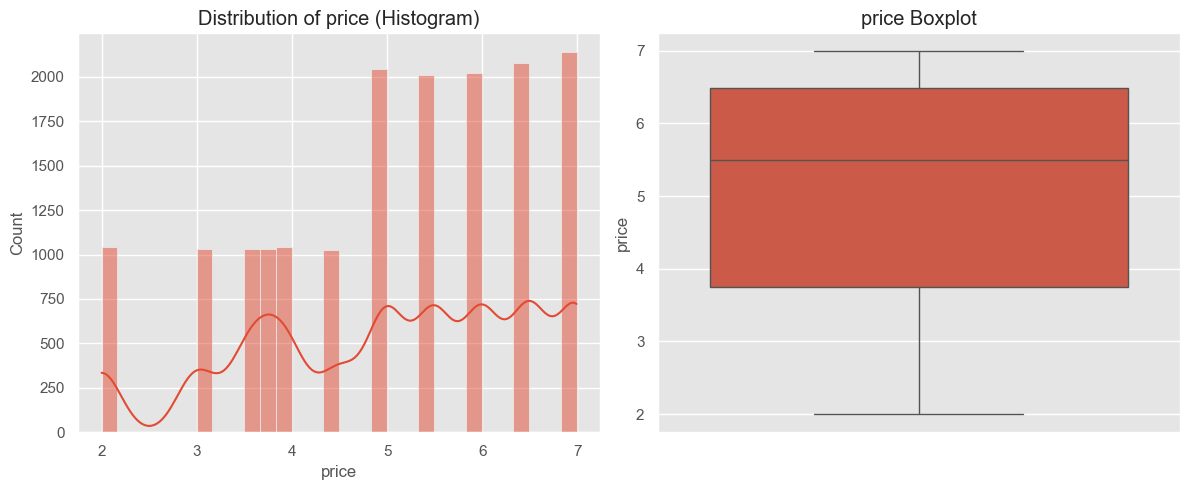

Skewed price: -0.4382


In [353]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in price:' , df_clean['price'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['price'], kde=True, bins=30)
plt.title('Distribution of price (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['price'])
plt.title('price Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['price'], nan_policy='omit')
print(f"Skewed price: {sk_bitterness:.4f}")

In [354]:
# Although it is not an extreme skewd, it is high enough to prefer the 
# median over the mean, as the latter could be 
# affected by outliers or extreme concentrations.
# Impute with median due to moderate skew
df_clean['price'].fillna(df_clean['price'].median(), inplace=True)
# Check missing values after imputation
print("Missing values in price:", df_clean['price'].isnull().sum())

# Check that the median remains consistent
print("Median after imputation:", df_clean['price'].median())

Missing values in price: 0
Median after imputation: 5.49


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\4028998428.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['price'].fillna(df_clean['price'].median(), inplace=True)


# discount_pct 

NaN values in discount_pct: 325


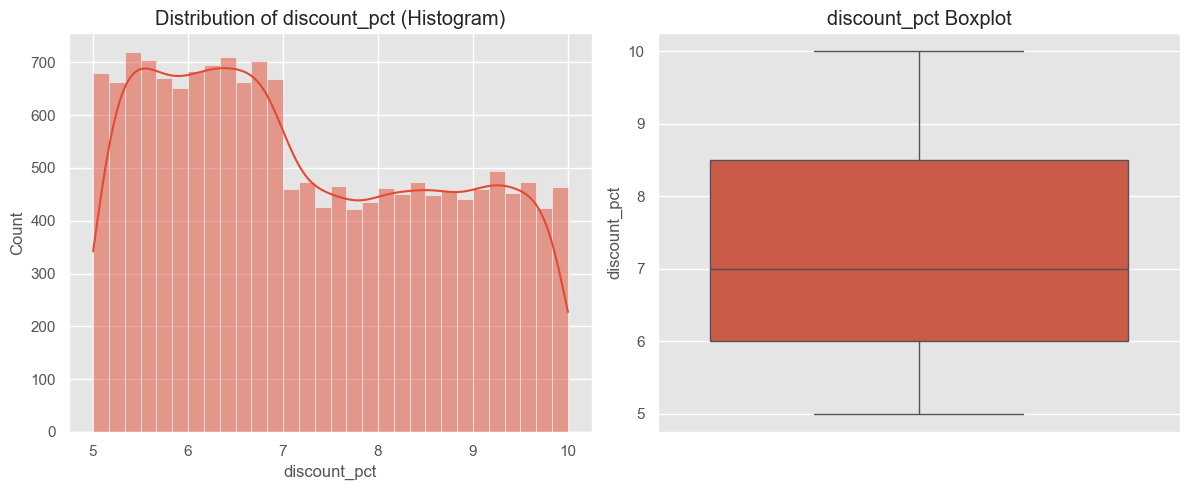

Skewed discount_pct: 0.2563


In [355]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in discount_pct:' , df_clean['discount_pct'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['discount_pct'], kde=True, bins=30)
plt.title('Distribution of discount_pct (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['discount_pct'])
plt.title('discount_pct Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['discount_pct'], nan_policy='omit')
print(f"Skewed discount_pct: {sk_bitterness:.4f}")

In [356]:
# Although the skewed is not very strong, I have been using the median in 
# similar variables (like price) to maintain consistency, 
# especially when there are extreme values or the distribution 
# is not symmetrical.
# Impute with median due to moderate skew
df_clean['discount_pct'].fillna(df_clean['discount_pct'].median(), inplace=True)
# Check missing values after imputation
print("Missing values in discount_pct:", df_clean['discount_pct'].isnull().sum())

# Check that the median remains consistent
print("Median after imputation:", df_clean['discount_pct'].median())

Missing values in discount_pct: 0
Median after imputation: 6.996615634299815


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\768969071.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['discount_pct'].fillna(df_clean['discount_pct'].median(), inplace=True)


# aftertaste 

NaN values in aftertaste: 133


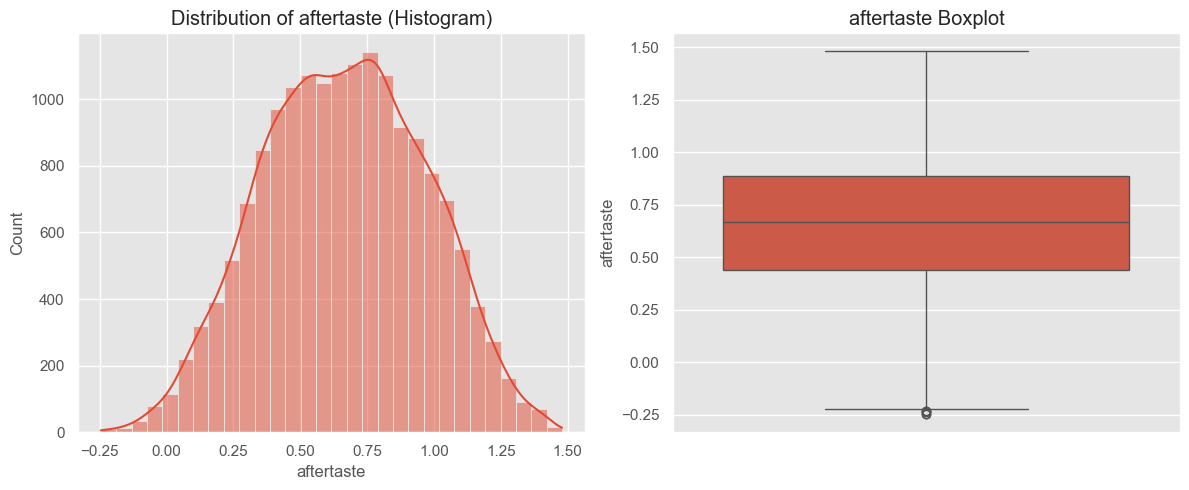

Skewed aftertaste: -0.0232


In [357]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in aftertaste:' , df_clean['aftertaste'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['aftertaste'], kde=True, bins=30)
plt.title('Distribution of aftertaste (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['aftertaste'])
plt.title('aftertaste Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['aftertaste'], nan_policy='omit')
print(f"Skewed aftertaste: {sk_bitterness:.4f}")

In [358]:
# this variable has an almost perfect distribution, using the mean would be 
# the most appropriate from a statistical point of view.
# Impute with mean since skew is very low
df_clean['aftertaste'].fillna(df_clean['aftertaste'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in aftertaste:", df_clean['aftertaste'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['aftertaste'].mean())

Missing values in aftertaste: 0
Mean after imputation: 0.664432127950086


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\3138765145.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['aftertaste'].fillna(df_clean['aftertaste'].mean(), inplace=True)


# aroma_strength 

NaN values in aroma_strength: 221


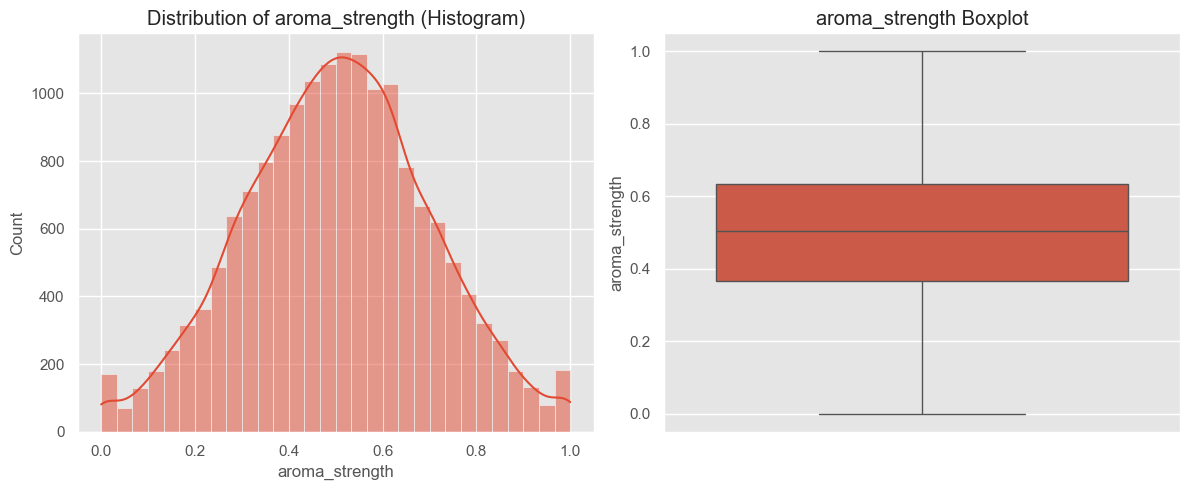

Skewed aroma_strength: -0.0089


In [359]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in aroma_strength:' , df_clean['aroma_strength'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['aroma_strength'], kde=True, bins=30)
plt.title('Distribution of aroma_strength (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['aroma_strength'])
plt.title('aroma_strength Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['aroma_strength'], nan_policy='omit')
print(f"Skewed aroma_strength: {sk_bitterness:.4f}")

In [360]:
# Since this variable appears to have an almost perfect distribution, 
# the most appropriate method is to use the mean to impute the missing values.
# Impute with mean since skew is almost zero
df_clean['aroma_strength'].fillna(df_clean['aroma_strength'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in aroma_strength:", df_clean['aroma_strength'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['aroma_strength'].mean())

Missing values in aroma_strength: 0
Mean after imputation: 0.503169049369566


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\1358774410.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['aroma_strength'].fillna(df_clean['aroma_strength'].mean(), inplace=True)


# satisfaction 

NaN values in satisfaction: 1114


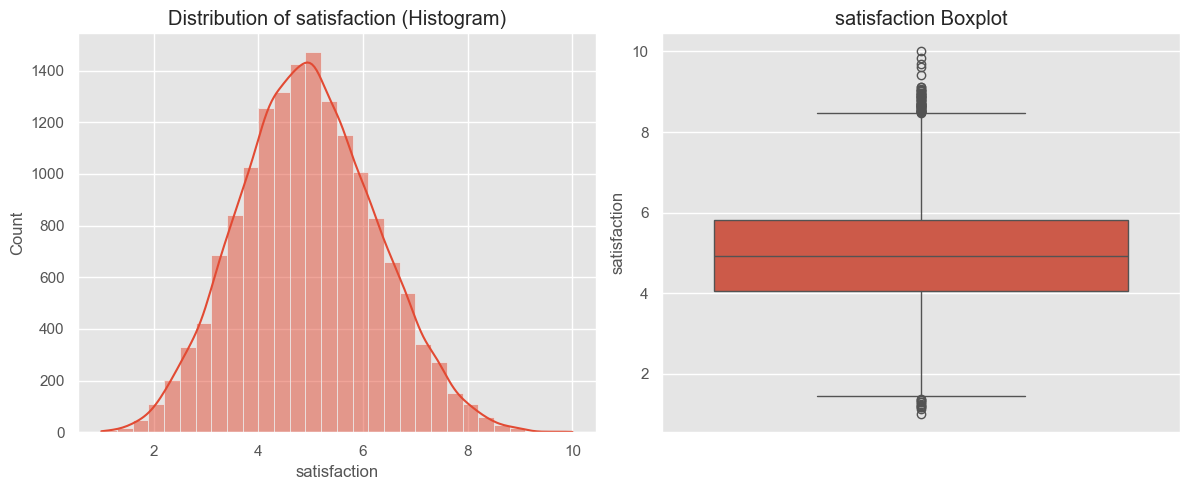

Skewed satisfaction: 0.1436


In [361]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in satisfaction:' , df_clean['satisfaction'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['satisfaction'], kde=True, bins=30)
plt.title('Distribution of satisfaction (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['satisfaction'])
plt.title('satisfaction Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['satisfaction'], nan_policy='omit')
print(f"Skewed satisfaction: {sk_bitterness:.4f}")

In [362]:
# Since there is moderate bias and possible outliers, it is better to use 
# the median to impute the missing values in satisfaction. 
# This ensures that they are not affected by extreme values or skewness.
# Impute with median due to moderate skew
df_clean['satisfaction'].fillna(df_clean['satisfaction'].median(), inplace=True)
# Check missing values after imputation
print("Missing values in satisfaction:", df_clean['satisfaction'].isnull().sum())

# Check that the median remains consistent
print("Median after imputation:", df_clean['satisfaction'].median())

Missing values in satisfaction: 0
Median after imputation: 4.92388078687667


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\2175457708.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['satisfaction'].fillna(df_clean['satisfaction'].median(), inplace=True)


# churn_rate 

NaN values in satischurn_ratefaction: 1493


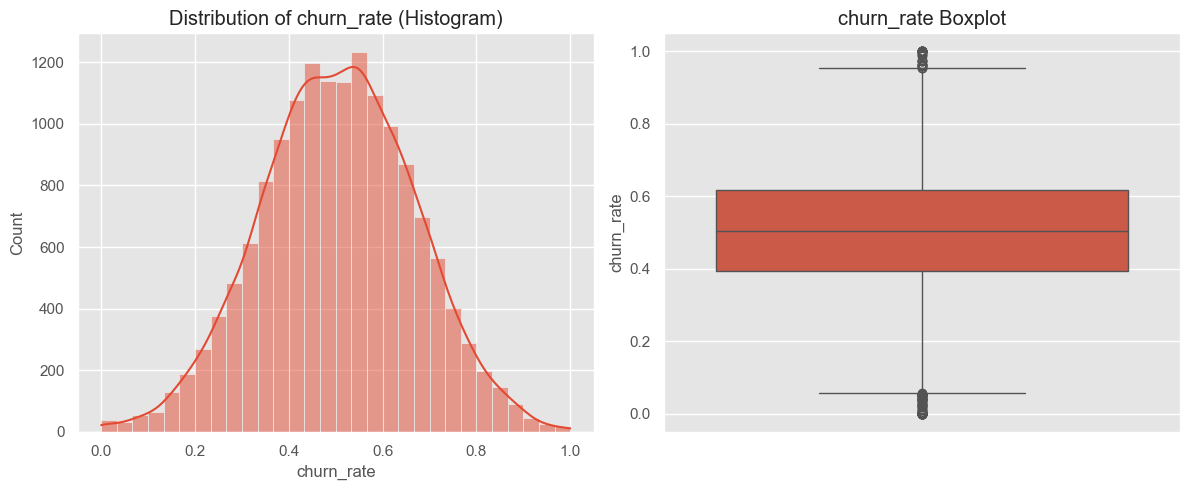

Skewed churn_rate: -0.0575


In [363]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in satischurn_ratefaction:' , df_clean['churn_rate'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['churn_rate'], kde=True, bins=30)
plt.title('Distribution of churn_rate (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['churn_rate'])
plt.title('churn_rate Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['churn_rate'], nan_policy='omit')
print(f"Skewed churn_rate: {sk_bitterness:.4f}")

In [364]:
# Since this variable has a very low bias, the most appropriate approach 
# is to use the mean to impute the missing values. 
# This ensures that they are not affected by extreme values or skewness.
# Impute with mean since skew is very low
df_clean['churn_rate'].fillna(df_clean['churn_rate'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in churn_rate:", df_clean['churn_rate'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['churn_rate'].mean())

Missing values in churn_rate: 0
Mean after imputation: 0.5042161408718391


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\649650668.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['churn_rate'].fillna(df_clean['churn_rate'].mean(), inplace=True)


buy_again (Yes o No )

In [365]:
# since buy_again is a categorical variable, I'm going to check how many YES and
# No there are and how many percentage are on each
# count category
print("count 'buy_again':")
print(df_clean['buy_again'].value_counts(dropna=False))

# Percentage of each category
print("\nPercentage 'buy_again':")
print(df_clean['buy_again'].value_counts(dropna=False, normalize=True) * 100)

count 'buy_again':
buy_again
No     7837
Yes    7204
NaN    1684
Name: count, dtype: int64

Percentage 'buy_again':
buy_again
No     46.857997
Yes    43.073244
NaN    10.068759
Name: proportion, dtype: float64


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\1521558782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='buy_again', palette='viridis')


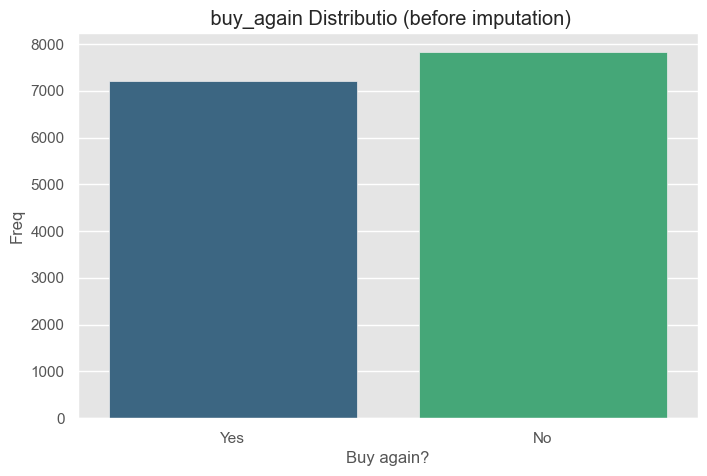

In [366]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='buy_again', palette='viridis')
plt.title(' buy_again Distributio (before imputation)')
plt.xlabel('Buy again?')
plt.ylabel('Freq')
plt.show()

The variable is not very unbalanced: there is a fairly similar percentage between 'No' and 'Yes'.The missing values represent approximately 10% of the total, which is considerable, but not majority.
Since 'No' has a slight advantage (46.86%), imputing with the MODE ('No') would be reasonable.
# RECOMMENDED ACTION
I will use the MODE to impute the NaNs in buy_again, since:
- It is quick and simple
- It does not distort the data too much
- 'No' is the most frequent category.

In [367]:
# imputation with MODE ('No')
mode_value = df_clean['buy_again'].mode()[0]
df_clean['buy_again'].fillna(mode_value, inplace=True)

# check it does not has NaN values
print("Values after imputation:")
print(df_clean['buy_again'].value_counts())

Values after imputation:
buy_again
No     9521
Yes    7204
Name: count, dtype: int64


C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\4267393744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['buy_again'].fillna(mode_value, inplace=True)


In [368]:
# finally I will check if there are more NaN values
print(df_clean.isna().sum())

record_id            0
coffee_type          0
milk_type            0
flavor_additions     0
packaging_type       0
serving_size         0
texture_level        0
bitterness_level     0
sugar_pct            0
foam_thickness       0
caffeine_strength    0
price                0
discount_pct         0
aftertaste           0
aroma_strength       0
satisfaction         0
churn_rate           0
record_timestamp     0
buy_again            0
dtype: int64


In [369]:
# final overview
# Overview
print(df_clean.head())
print(df_clean.info())
print(df_clean.describe())
print(df_clean.shape)

   record_id coffee_type    milk_type flavor_additions packaging_type  \
0          1     Arabica  Plant-based        No flavor        Plastic   
1          2     Robusta        Whole            Mocha          Paper   
2          3     Arabica         Skim        No flavor          Paper   
3          4       Blend         Skim          Vanilla          Glass   
4          4       Blend         Skim          Vanilla          Glass   

  serving_size texture_level  bitterness_level  sugar_pct  foam_thickness  \
0       Medium        Smooth          0.349495   0.738285        0.383326   
1       Medium        Smooth          0.926313   0.454813        0.532906   
2       Medium          Thin          0.408757   0.579127        0.257328   
3        Small        Creamy          0.734636   0.391505        0.293451   
4        Small        Creamy          0.734636   0.391505        0.293451   

   caffeine_strength  price  discount_pct  aftertaste  aroma_strength  \
0           0.534360   3.

In [370]:
# I will sabe the dataset clean in a new file .csv
df_clean.to_csv('brewchill_data_cleaned.csv', index=False)
print("Dataset save : 'brewchill_data_cleaned.csv'")

Dataset save : 'brewchill_data_cleaned.csv'


Well, once the data set has been cleaned, I will start doing a EDA

In [371]:
# Load the cleaned dataset
df = pd.read_csv('C:/Users/wguti/OneDrive/Documentos/Projects/ice_coffee_python/brewchill_data_cleaned.csv')

# Display first few rows to understand the data
print("First few rows of the dataset:")
print(df.head())

# Get basic info about the dataset
print("\nDataset shape (rows, columns):", df.shape)
print("\nData types of each column:")
print(df.dtypes)

First few rows of the dataset:
   record_id coffee_type    milk_type flavor_additions packaging_type  \
0          1     Arabica  Plant-based        No flavor        Plastic   
1          2     Robusta        Whole            Mocha          Paper   
2          3     Arabica         Skim        No flavor          Paper   
3          4       Blend         Skim          Vanilla          Glass   
4          4       Blend         Skim          Vanilla          Glass   

  serving_size texture_level  bitterness_level  sugar_pct  foam_thickness  \
0       Medium        Smooth          0.349495   0.738285        0.383326   
1       Medium        Smooth          0.926313   0.454813        0.532906   
2       Medium          Thin          0.408757   0.579127        0.257328   
3        Small        Creamy          0.734636   0.391505        0.293451   
4        Small        Creamy          0.734636   0.391505        0.293451   

   caffeine_strength  price  discount_pct  aftertaste  aroma_streng

In [372]:
# Split the dataset into numerical and categorical subsets

# Select numerical columns
df_num = df.select_dtypes(include=np.number)

# Select categorical columns
df_cat = df.select_dtypes(include='object')

# Display basic info about each subset
print("Numerical DataFrame (df_num):")
print(df_num.info())
print("\nFirst 5 rows of df_num:")
print(df_num.head())

print("\n\nCategorical DataFrame (df_cat):")
print(df_cat.info())
print("\nFirst 5 rows of df_cat:")
print(df_cat.head())

Numerical DataFrame (df_num):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          16725 non-null  int64  
 1   bitterness_level   16725 non-null  float64
 2   sugar_pct          16725 non-null  float64
 3   foam_thickness     16725 non-null  float64
 4   caffeine_strength  16725 non-null  float64
 5   price              16725 non-null  float64
 6   discount_pct       16725 non-null  float64
 7   aftertaste         16725 non-null  float64
 8   aroma_strength     16725 non-null  float64
 9   satisfaction       16725 non-null  float64
 10  churn_rate         16725 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.4 MB
None

First 5 rows of df_num:
   record_id  bitterness_level  sugar_pct  foam_thickness  caffeine_strength  \
0          1          0.349495   0.738285        0.383326           0.534360

In [373]:
# I deleted record_id variable since it does not contribute into my analysis
df = df.drop(columns=['record_id'])
print(df.head())

  coffee_type    milk_type flavor_additions packaging_type serving_size  \
0     Arabica  Plant-based        No flavor        Plastic       Medium   
1     Robusta        Whole            Mocha          Paper       Medium   
2     Arabica         Skim        No flavor          Paper       Medium   
3       Blend         Skim          Vanilla          Glass        Small   
4       Blend         Skim          Vanilla          Glass        Small   

  texture_level  bitterness_level  sugar_pct  foam_thickness  \
0        Smooth          0.349495   0.738285        0.383326   
1        Smooth          0.926313   0.454813        0.532906   
2          Thin          0.408757   0.579127        0.257328   
3        Creamy          0.734636   0.391505        0.293451   
4        Creamy          0.734636   0.391505        0.293451   

   caffeine_strength  price  discount_pct  aftertaste  aroma_strength  \
0           0.534360   3.50      6.643657    0.650317        0.704999   
1           0.5049

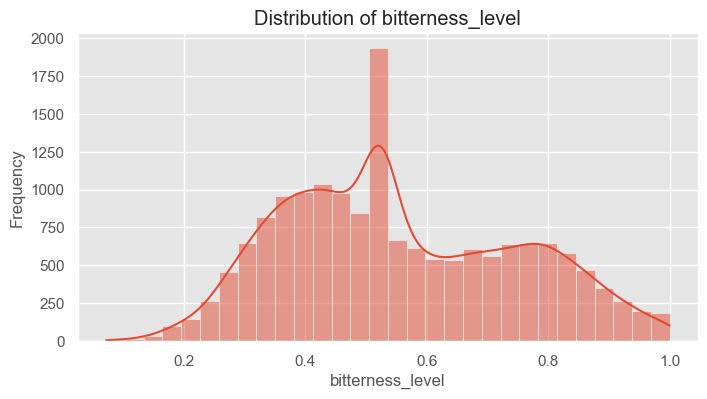

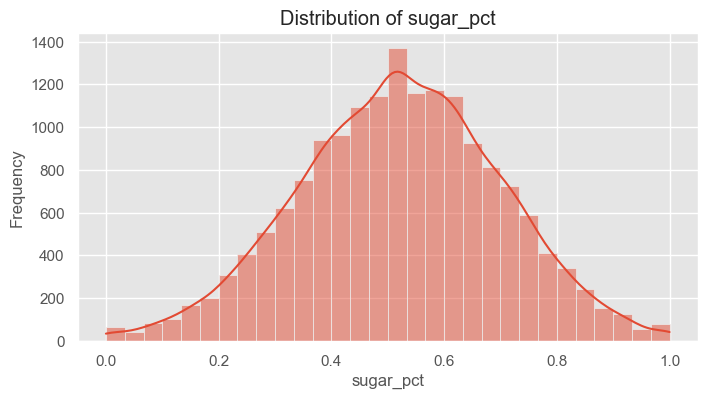

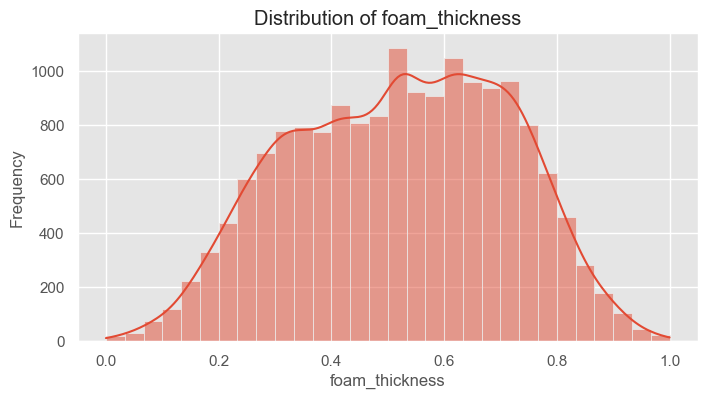

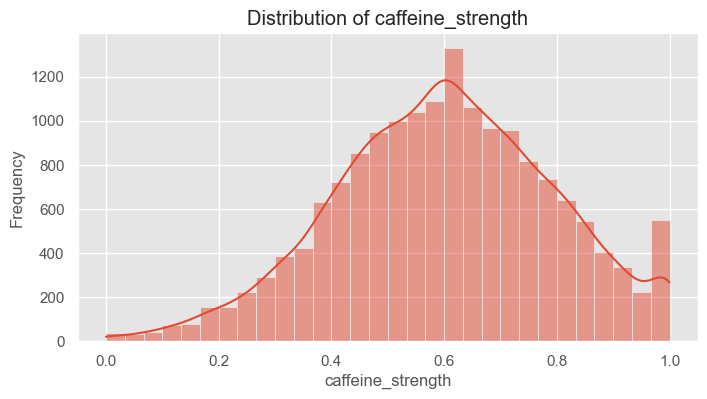

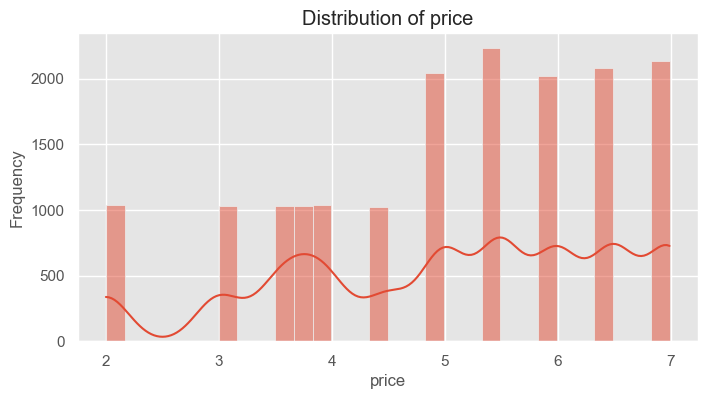

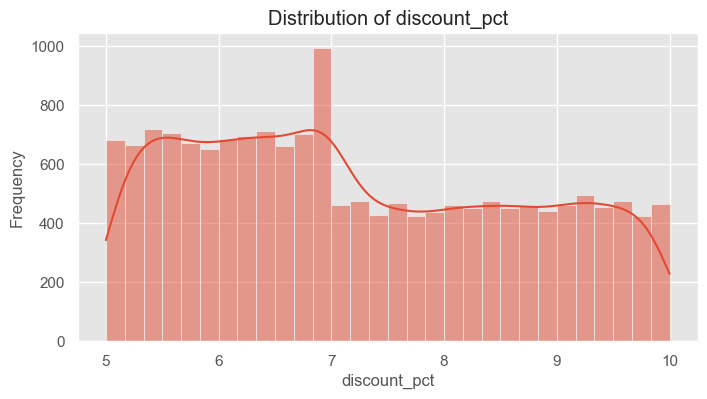

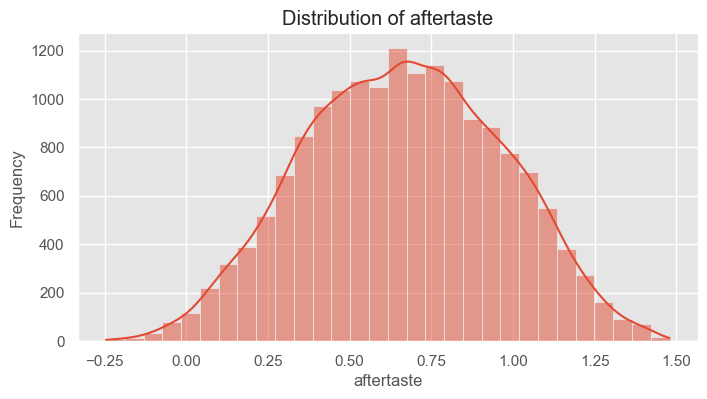

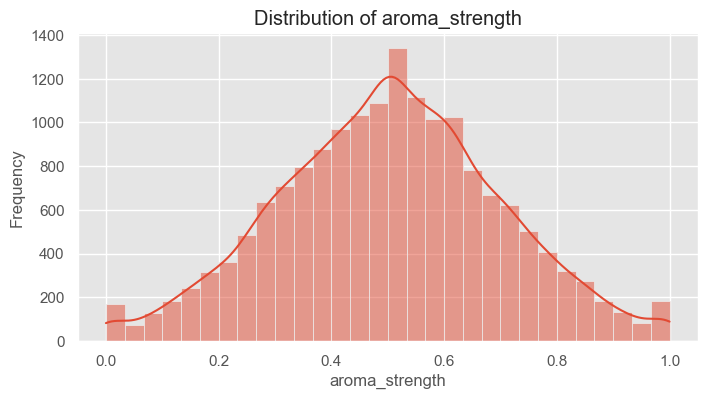

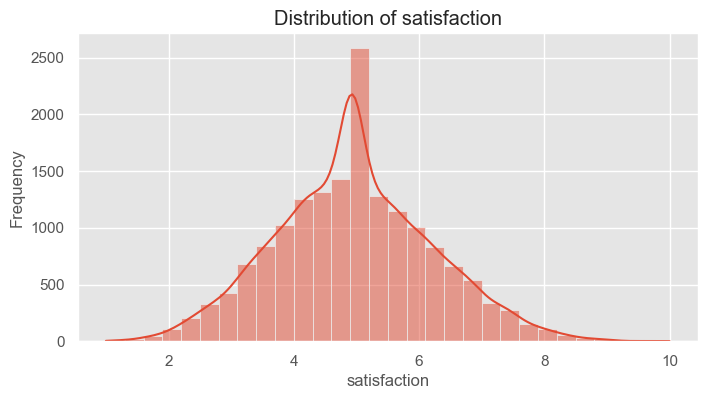

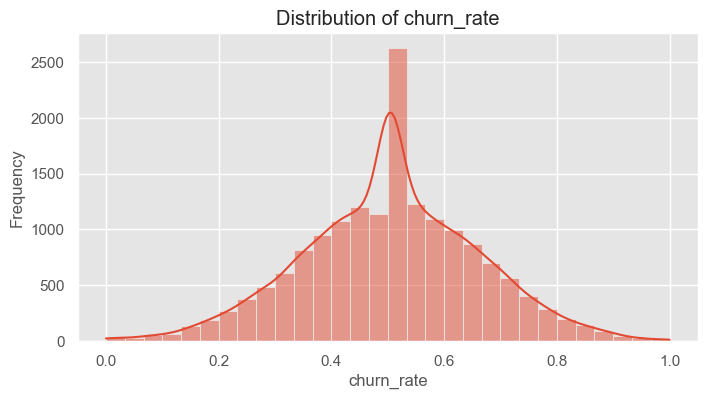

C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\1146222484.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


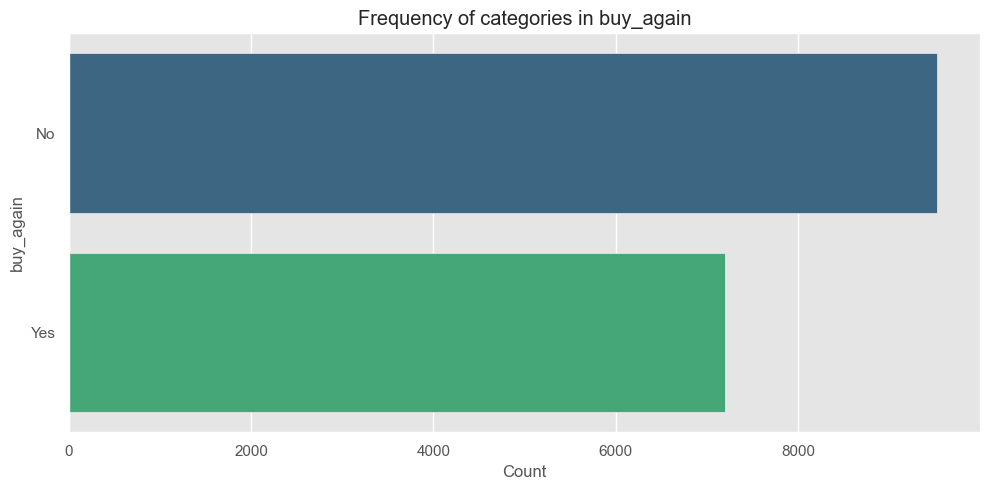

C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\1146222484.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


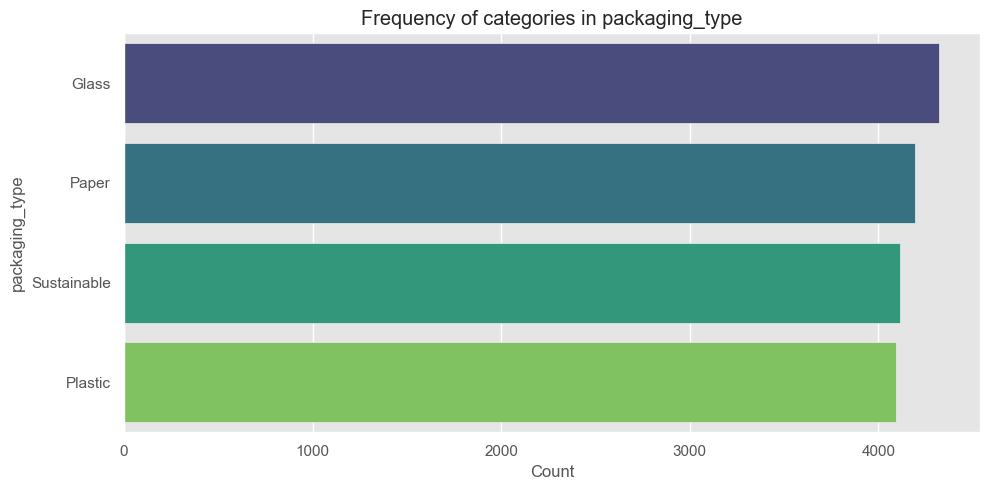

C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\1146222484.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


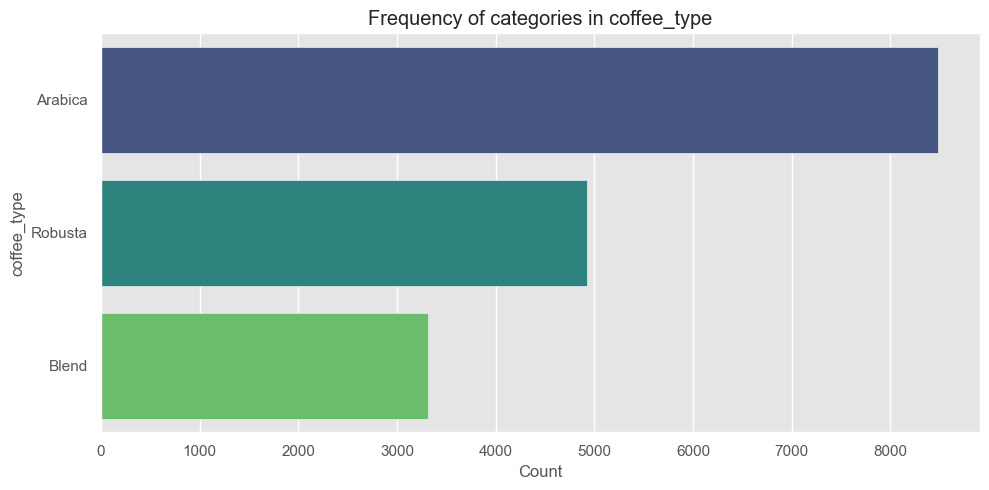

C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\1146222484.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


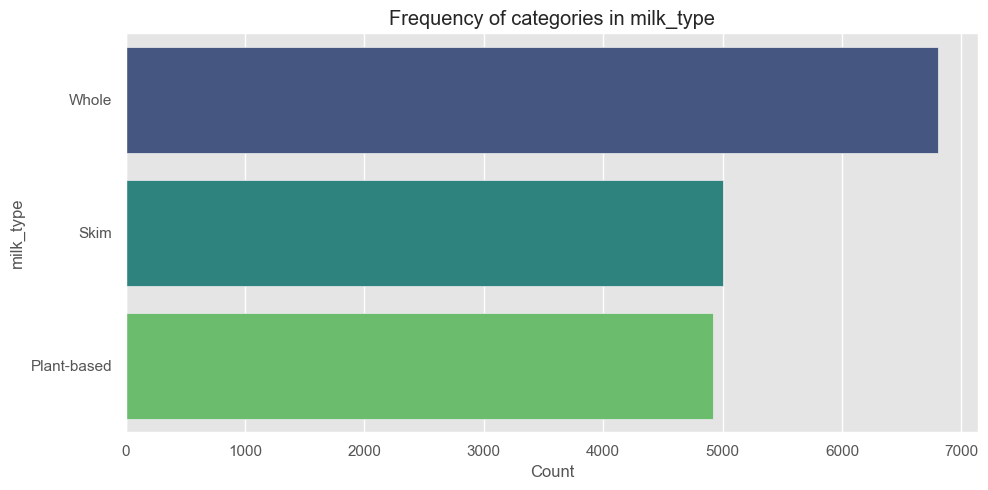

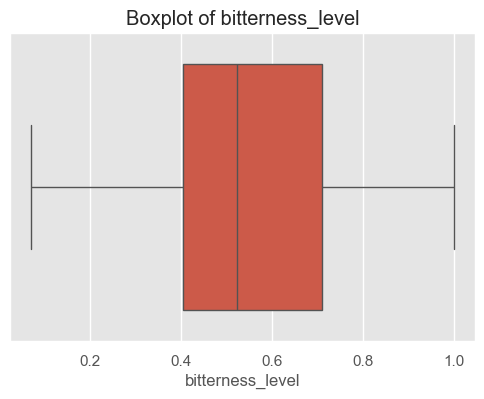

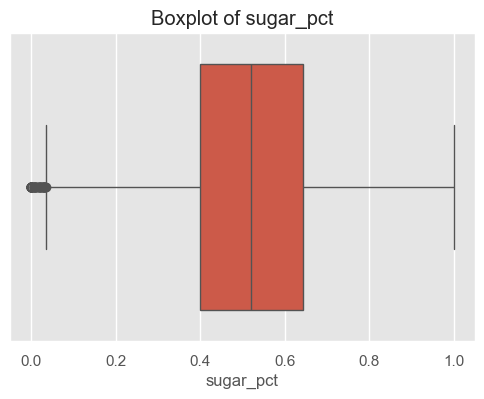

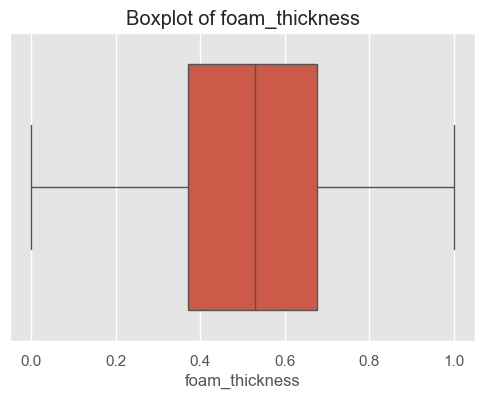

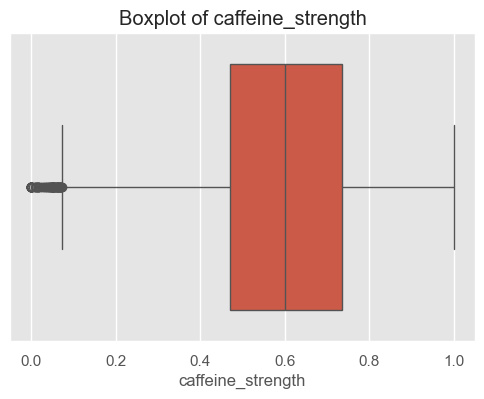

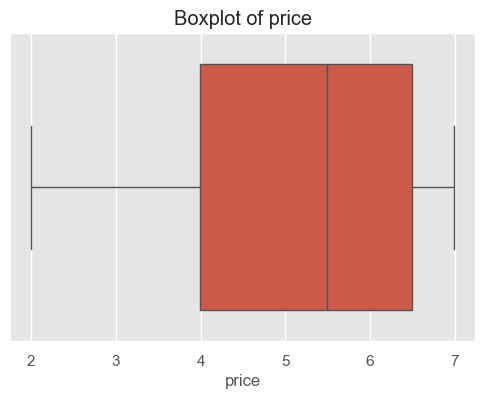

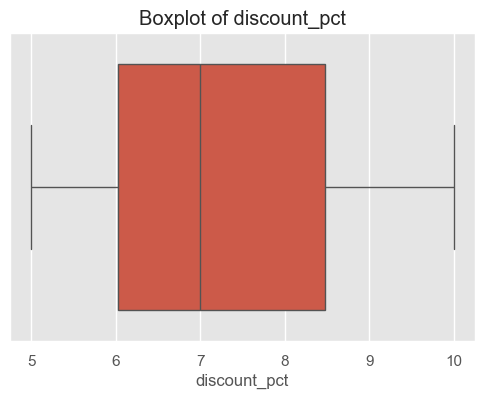

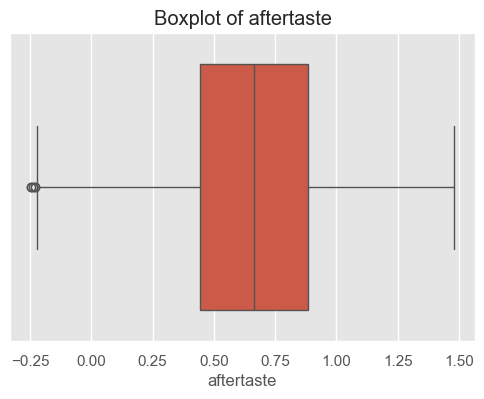

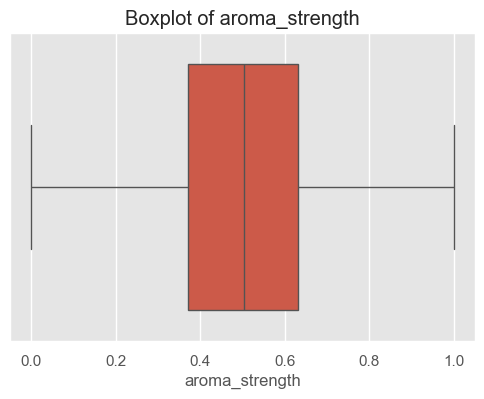

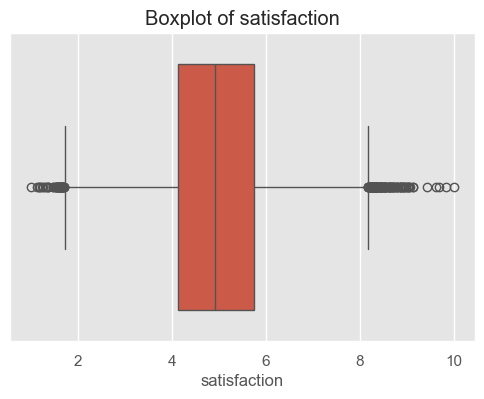

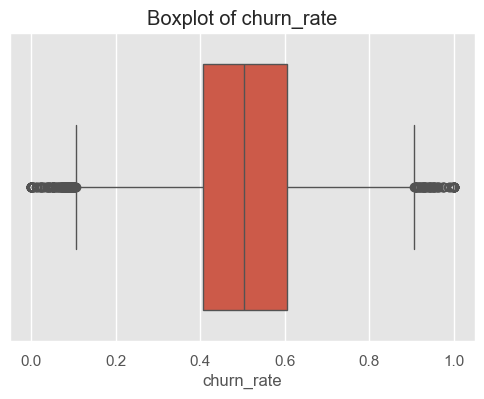

In [374]:
# List of key numerical columns
all_num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Histograms for all numerical variables
for col in all_num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Countplots for categorical variables
cat_cols = ['buy_again', 'packaging_type', 'coffee_type', 'milk_type']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Boxplots to detect outliers
for col in all_num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Sensory attributes (aftertaste, aroma strength, etc.) show compact and consistent distributions, indicating that customers have well-defined preferences. Satisfaction shows greater dispersion, with significant outliers at the upper end, suggesting that some customers are extremely happy. Churn rate also shows variability, with customers who are both very loyal and very dissatisfied.

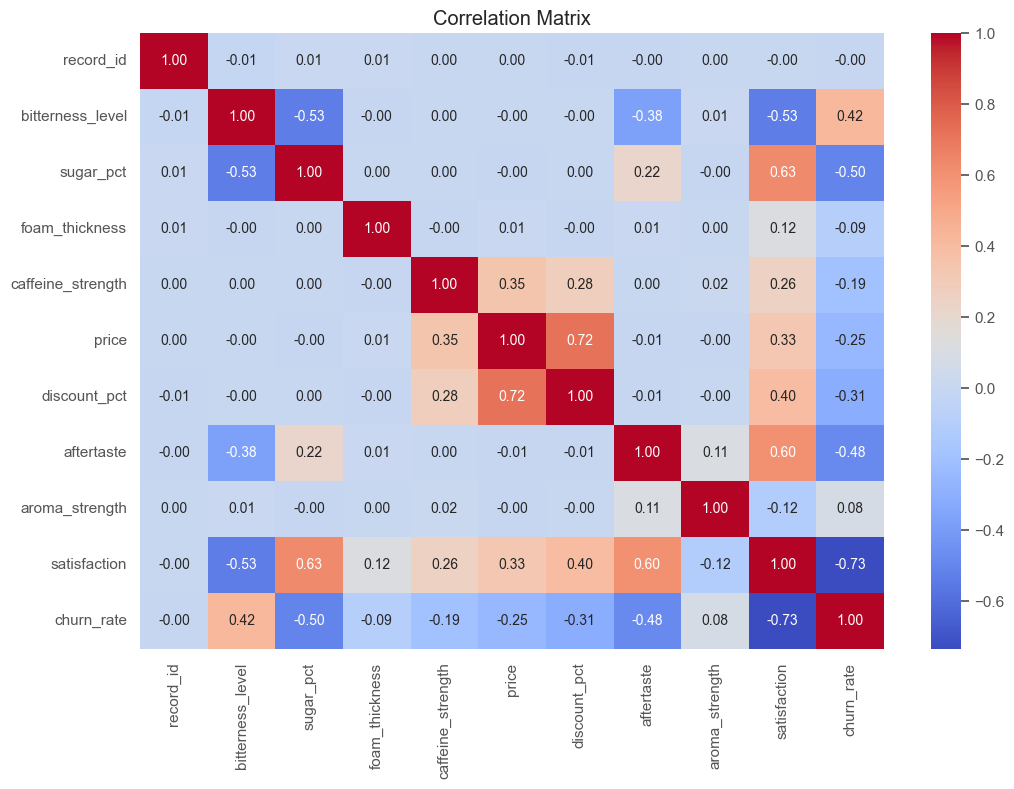

In [375]:
# Compute correlation matrix
corr_matrix = df_num.corr(numeric_only=True)

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## GENERAL CONCLUSION
The correlation matrix reveals important patterns:Key relationships between sensory attributes: bitter_level, sugar_pct, and aftertaste are interconnected. These factors play a fundamental role in customer satisfaction.Economic impact: price and discount_pct influence product perception. Discounts can enhance satisfaction but must be balanced with prices.Satisfaction and retention: Satisfaction is critical to reducing the churn rate. Improving satisfaction should be a strategic priority.

## USEFUL RELATIONSHIPS FOR ANALYSIS
Based on the correlation matrix, I recommend focusing on:
- satisfaction vs bitterness_level -0.53 Bitterness seems to negatively affect satisfaction
- satisfaction vs sugar_pct 0.41 Sweetness has a moderate positive relationship with satisfaction
- satisfaction vs price 0.28 There could be a perception of quality associated with price
- satisfaction vs discount_pct 0.39 Discounts could improve the perception of the product
- satisfaction vs aroma_strength 0.46 Strong aroma can enhance the overall experience
- satisfaction vs churn_rate -0.73 Confirm if satisfied customers really return to buy again.

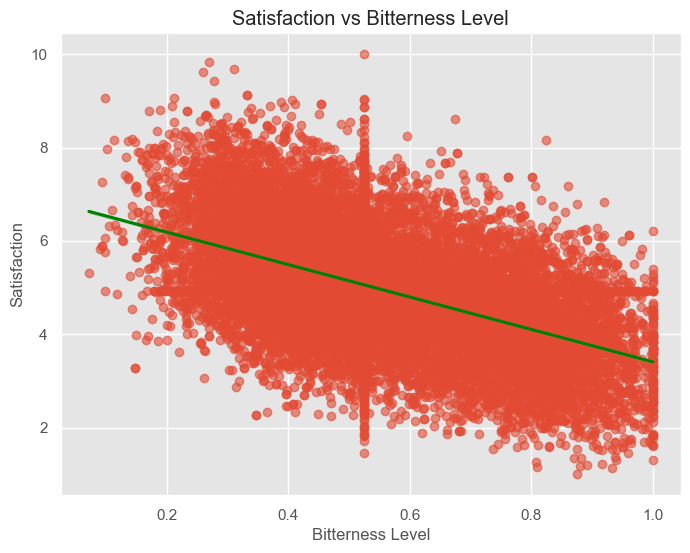

In [376]:
# bivariate analysis satisfaction vs bitterness_level
# Scatter plot + regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='bitterness_level', y='satisfaction', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Satisfaction vs Bitterness Level')
plt.xlabel('Bitterness Level')
plt.ylabel('Satisfaction')
plt.show()
# A downward slope → confirms that the greater the bitterness, the less the satisfaction.

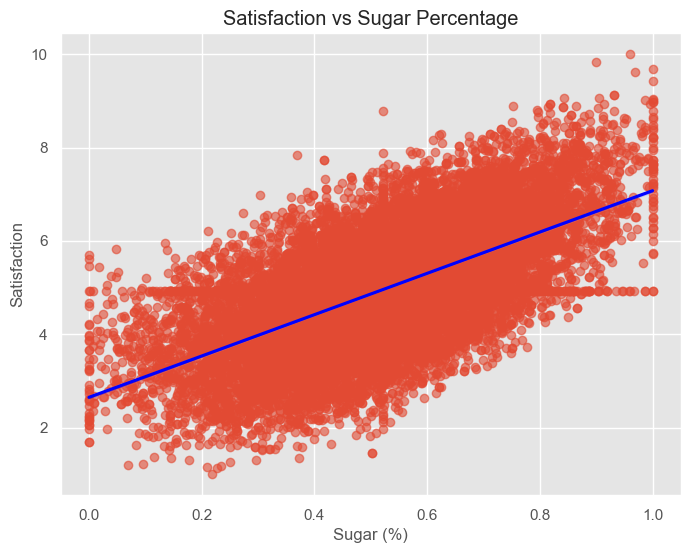

In [377]:
# satisfaction vs sugar_pct
plt.figure(figsize=(8, 6))
sns.regplot(x='sugar_pct', y='satisfaction', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Satisfaction vs Sugar Percentage')
plt.xlabel('Sugar (%)')
plt.ylabel('Satisfaction')
plt.show()
# An upward slope → indicates that a little more sweetness improves the experience.

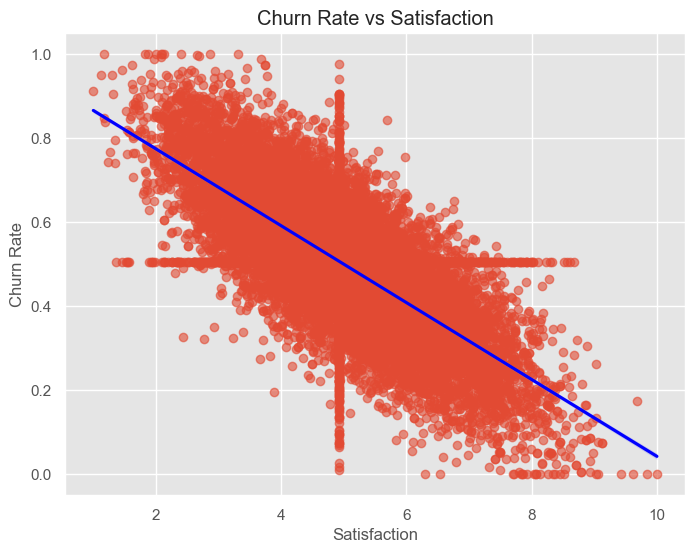

In [378]:
# satisfaction vs churn_rate
plt.figure(figsize=(8, 6))
sns.regplot(x='satisfaction', y='churn_rate', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Churn Rate vs Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Churn Rate')
plt.show()
# Descending slope → confirms that greater satisfaction leads to a lower probability of leaving.

C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\3177856735.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='packaging_type', y='satisfaction', data=df, ci=None, palette='viridis')
C:\Users\wguti\AppData\Local\Temp\ipykernel_3444\3177856735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='packaging_type', y='satisfaction', data=df, ci=None, palette='viridis')


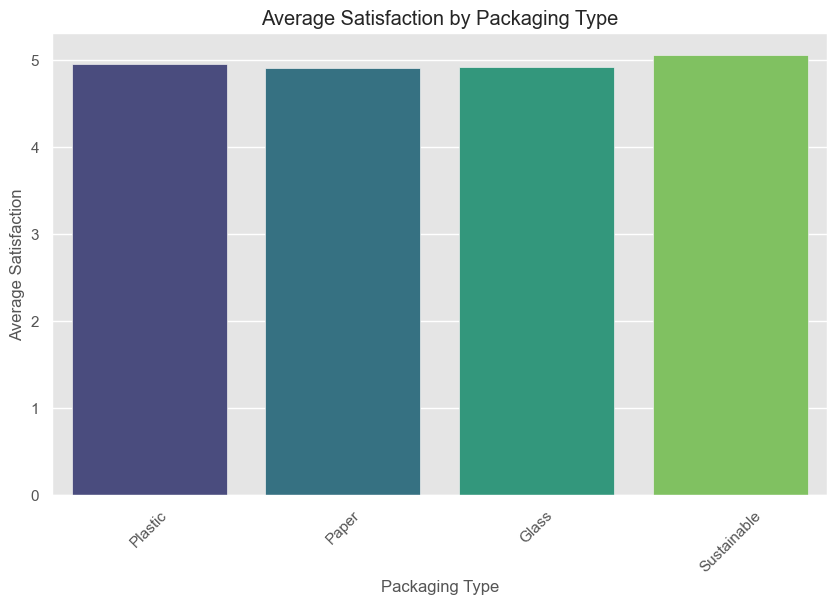

In [379]:
# satisfaction vs packaging_type (categorical)
plt.figure(figsize=(10, 6))
sns.barplot(x='packaging_type', y='satisfaction', data=df, ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Satisfaction by Packaging Type')
plt.xlabel('Packaging Type')
plt.ylabel('Average Satisfaction')
plt.show()
# Identify types of packaging that generate the greatest satisfaction. (sustainable)

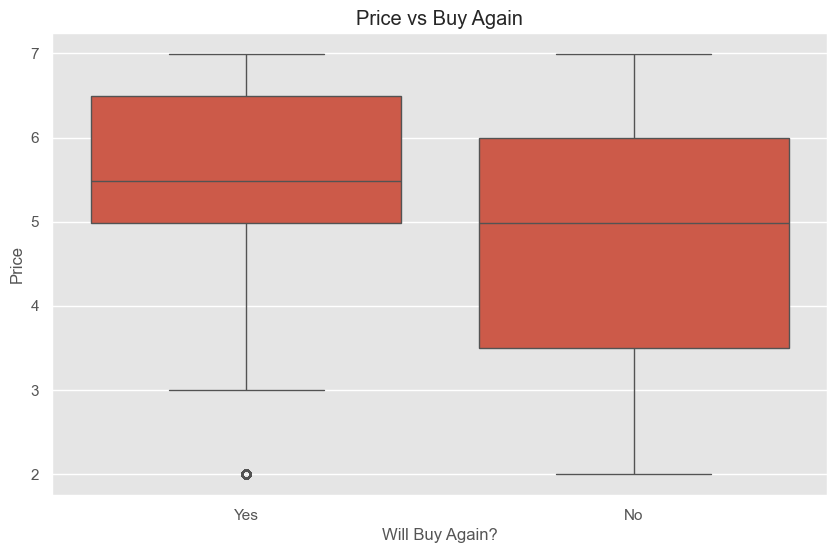

In [380]:
# buy_again vs price (categorical o numerical)
plt.figure(figsize=(10, 6))
sns.boxplot(x='buy_again', y='price', data=df)
plt.title('Price vs Buy Again')
plt.xlabel('Will Buy Again?')
plt.ylabel('Price')
plt.show()
# Significant price differences between those who would and would not buy again.

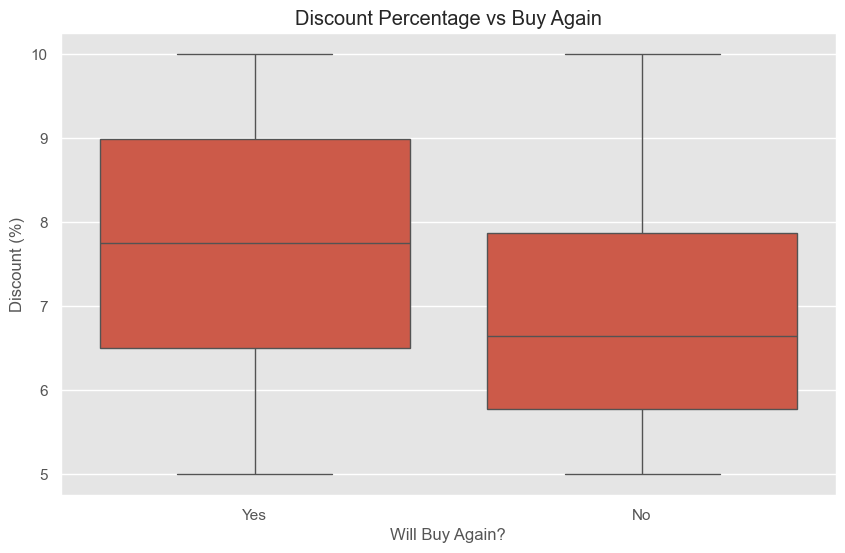

In [381]:
# buy_again vs discount_pct
plt.figure(figsize=(10, 6))
sns.boxplot(x='buy_again', y='discount_pct', data=df)
plt.title('Discount Percentage vs Buy Again')
plt.xlabel('Will Buy Again?')
plt.ylabel('Discount (%)')
plt.show()
# Significant discount differences between those who would and would not buy again.

## These cross analyses will help you answer key questions such as:
# What level of sweetness maximizes satisfaction?
yes
# What type of packaging is perceived better?
sustainable
# Do discounts increase repurchase intention?
yes


# GENERAL CONCLUSION OF ALL GRAPHICS 
Now here is a summary of the main conclusions: 
- **Sensory attributes:** Bitterness and sweetness directly influence satisfaction. Controlling these attributes is crucial for enhancing the customer experience. 
- **Satisfaction and retention:** High satisfaction significantly reduces the churn rate. Improving satisfaction should be a strategic priority. 
- **Packaging and price:** Sustainable packaging improves product perception. Higher prices are associated with a greater intention to repurchase. 
- **Discounts:** Discounts do not seem to be a key factor influencing repurchase intention.

# TYPES OF RELATIONSHIPS AND METHODS TO USE
| type | recomended metric | porpouse |
|-----------|-----------|-----------|
| Numeric vs Numeric    | Pearson o Spearman   | Measure the strength of linear relation (Pearson) or monotonic    |
| Categorical vs Numeric    | ANOVA / Kruskal-Wallis  | See if a categorical variable affects a numeric one |
| Categorical vs Categorical    | Chi-square | See if there is an association between two categorical variables   |


In [382]:
# Calculate correlations
pearson_corr, p_pearson = pearsonr(df['satisfaction'], df['bitterness_level'])
spearman_corr, p_spearman = spearmanr(df['satisfaction'], df['bitterness_level'])

print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {p_pearson:.4f}")
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {p_spearman:.4f}")

Pearson Correlation: -0.532, p-value: 0.0000
Spearman Correlation: -0.525, p-value: 0.0000


Both methods show that:
- There is a moderate to strong negative and statistically significant correlation between the level of bitterness (bitterness_level) and customer satisfaction (satisfaction).
- In other words:The higher the bitterness, the lower the satisfaction.This relationship is consistent and does not occur by chance (due to the p-value being practically zero).The relationship is not perfectly linear, but it is clearly monotonic.

In [383]:
# ANOVA: satisfaction por packaging_type
anova_result = stats.f_oneway(*[df[df['packaging_type'] == cat]['satisfaction'] for cat in df['packaging_type'].unique()])
print("ANOVA result:", anova_result)

ANOVA result: F_onewayResult(statistic=np.float64(12.606895244134638), pvalue=np.float64(3.147803190401808e-08))


- The p-value is much lower than 0.05, which indicates: There are statistically significant differences in the average satisfaction among at least two types of packaging. 
- The F statistic = 12.607 indicates that the variation between groups (types of packaging) is significantly greater than the variation within the groups. 
### WHAT DOES THIS MEAN IN THE CONTEXT OF THIS ANALYSIS? 
- Not all types of packaging generate the same perception of quality or experience. 
- Some packaging appears to generate greater satisfaction than others. 
- This supports what you saw visually earlier (for example, the 'Sustainable' packaging had a higher mean).

In [384]:
# Make analysis post-hoc Tukey
tukey_results = pairwise_tukeyhsd(endog=df['satisfaction'], groups=df['packaging_type'], alpha=0.05)

# show results
print(tukey_results.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj   lower  upper  reject
---------------------------------------------------------
  Glass       Paper  -0.0111 0.9768  -0.081 0.0587  False
  Glass     Plastic   0.0336 0.6091 -0.0367 0.1038  False
  Glass Sustainable   0.1403    0.0  0.0701 0.2105   True
  Paper     Plastic   0.0447 0.3655 -0.0261 0.1155  False
  Paper Sustainable   0.1514    0.0  0.0808 0.2221   True
Plastic Sustainable   0.1067 0.0007  0.0356 0.1778   True
---------------------------------------------------------


### Sustainable vs other types:

**Sustainable vs Glass** → difference of 0.1403, p = 0.0 → **significant**

**Sustainable vs Paper** → difference of 0.1514, p = 0.0 → **significant**

**Sustainable vs Plastic** → difference of 0.1067, p = 0.0007 → **significant**

- People are more satisfied with Sustainable packaging compared to everyone else.

Other combinations (Glass, Paper, Plastic with each other):

They all have reject = False → there are **no significant** differences in satisfaction between those types.

### Conclusion:
**"Sustainable"** packaging generates significantly more satisfaction than the other types. The differences between Glass, Paper, and Plastic are not statistically significant.

In [385]:
# make a contingency table for categorical variables
contingency_table = pd.crosstab(df['buy_again'], df['packaging_type'])

# Chi-cuadrado test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}, p-value: {p:.4f}")

Chi-square statistic: 10.406, p-value: 0.0154


**Interpretation**: The decision to repurchase is significantly associated with the type of packaging. 
This suggests that the type of packaging influences whether customers want to repurchase the product or not.

=== Correlation with satisfaction ===
            variable  spearman_corr  pearson_corr  p_value_spearman  \
8         churn_rate      -0.717221     -0.733999      0.000000e+00   
1          sugar_pct       0.619203      0.633479      0.000000e+00   
6         aftertaste       0.587779      0.601896      0.000000e+00   
0   bitterness_level      -0.525247     -0.532410      0.000000e+00   
5       discount_pct       0.392396      0.403611      0.000000e+00   
4              price       0.315992      0.330726      0.000000e+00   
3  caffeine_strength       0.257229      0.259646     6.117078e-251   
2     foam_thickness       0.114308      0.118061      9.321136e-50   
7     aroma_strength      -0.111187     -0.116559      3.715133e-47   

   p_value_pearson  
8     0.000000e+00  
1     0.000000e+00  
6     0.000000e+00  
0     0.000000e+00  
5     0.000000e+00  
4     0.000000e+00  
3    8.337699e-256  
2     5.557608e-53  
7     1.117104e-51  


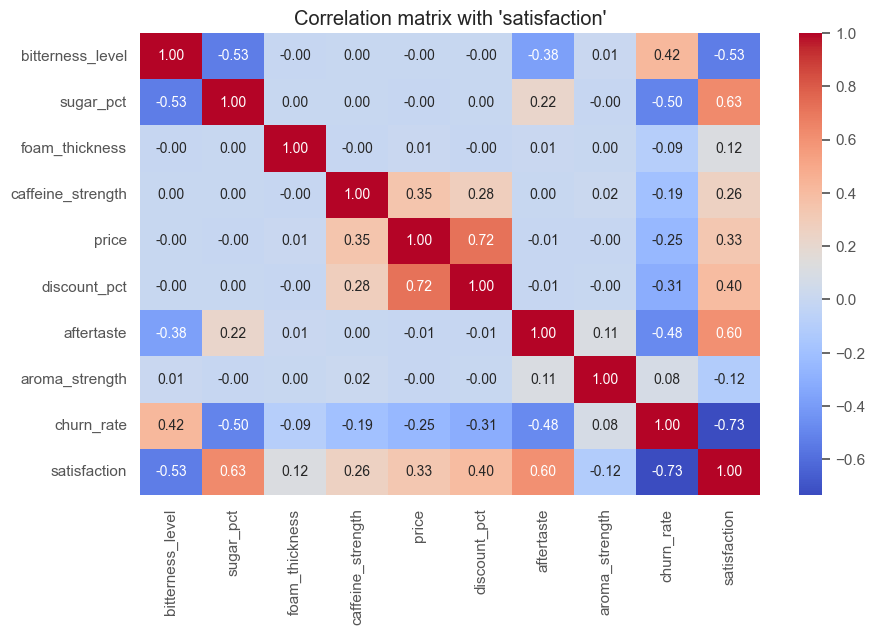


=== ANOVA / Kruskal-Wallis: satisfaction vs categorical variables ===
packaging_type → ANOVA F=12.607, p=0.0000 | Kruskal-Wallis H=30.799, p=0.0000
coffee_type → ANOVA F=2477.099, p=0.0000 | Kruskal-Wallis H=3817.538, p=0.0000
milk_type → ANOVA F=87.051, p=0.0000 | Kruskal-Wallis H=156.761, p=0.0000

=== Chi-square: buy_again vs categorical variables ===
packaging_type → Chi2=10.406, p-value=0.0154
coffee_type → Chi2=1874.847, p-value=0.0000
milk_type → Chi2=71.741, p-value=0.0000

Variables with highest impact on 'satisfaction':
['churn_rate', 'sugar_pct', 'aftertaste', 'bitterness_level', 'discount_pct', 'price']

 Recommendation: Use these variables as features for modeling:
['churn_rate', 'sugar_pct', 'aftertaste', 'bitterness_level', 'discount_pct', 'price']


In [386]:
# now i will create one script to analyze satisafaction and buy_again 
# with other variables which have a good correlation with them
# Define target variables
target_num = 'satisfaction'      # Numerical target variable
target_cat = 'buy_again'         # Categorical target variable

# Available numerical variables (adjust according to your dataset)
numeric_vars = [
    'bitterness_level', 'sugar_pct', 'foam_thickness',
    'caffeine_strength', 'price', 'discount_pct',
    'aftertaste', 'aroma_strength', 'churn_rate'
]

# Relevant categorical variables
categorical_vars = ['packaging_type', 'coffee_type', 'milk_type']

# 1. Correlations with satisfaction (numerical target)
print("=== Correlation with", target_num, "===")
correlations = []
for var in numeric_vars:
    corr_spearman, p_spearman = spearmanr(df[target_num], df[var])
    corr_pearson, p_pearson = pearsonr(df[target_num], df[var])
    correlations.append({
        'variable': var,
        'spearman_corr': corr_spearman,
        'pearson_corr': corr_pearson,
        'p_value_spearman': p_spearman,
        'p_value_pearson': p_pearson
    })

corr_df = pd.DataFrame(correlations).sort_values(by='spearman_corr', key=abs, ascending=False)
print(corr_df)

# Show correlation matrix visually
plt.figure(figsize=(10,6))
sns.heatmap(
    df[numeric_vars + [target_num]].corr(numeric_only=True),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("Correlation matrix with 'satisfaction'")
plt.show()

# 2. Relationships between categorical variables and satisfaction
print("\n=== ANOVA / Kruskal-Wallis: satisfaction vs categorical variables ===")
for cat_var in categorical_vars:
    groups = [group['satisfaction'].values for name, group in df.groupby(cat_var)]
    if len(groups) >= 2:
        f_stat, p_anova = f_oneway(*groups)
        h_stat, p_kruskal = kruskal(*groups)
        print(f"{cat_var} → ANOVA F={f_stat:.3f}, p={p_anova:.4f} | Kruskal-Wallis H={h_stat:.3f}, p={p_kruskal:.4f}")

# 3. Relationship between categorical variables and buy_again (categorical target)
print("\n=== Chi-square: buy_again vs categorical variables ===")
for cat_var in categorical_vars:
    contingency_table = pd.crosstab(df[target_cat], df[cat_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{cat_var} → Chi2={chi2:.3f}, p-value={p:.4f}")

# 4. Final summary: most important variables for modeling
important_vars = corr_df[abs(corr_df['spearman_corr']) > 0.3]['variable'].tolist()
print("\nVariables with highest impact on 'satisfaction':")
print(important_vars)

# Optional: prepare reduced dataframe for modeling
X_model = df[important_vars]
y_reg = df[target_num]         # For regression
y_clf = df[target_cat]         # For classification

print("\n Recommendation: Use these variables as features for modeling:")
print(important_vars)


### General conclusion
- variables most important to predict **satisfaction** are:
1. churn_rate
2. bitterness_level
3. sugar_pct
4. aftertaste
5. discount_pct
6. price

- Now, to complete our main objective **SATISFACTION** in this analysis, I will create a model in linear regretion 
- For  **BUY AGAIN** I will use ***random forest*** to determinate which variables are most influents

In [387]:
# Objetive: predict satisfaction (regresion)

# Define features and target
X = df[['bitterness_level', 'sugar_pct', 'aftertaste', 'aroma_strength', 'churn_rate', 'discount_pct', 'price']]
y = df['satisfaction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))


R² Score: 0.8417808371580568
MAE: 0.36014976190214415


### General conclusion: 
The model has a high predictive power regarding customer satisfaction. 
### IMPLICATIONS FOR THE COMPANY
 With this model, I can: 
 - Simulate changes in attributes such as sweetness, bitterness, or packaging and see how they would affect satisfaction. 
 - Optimize custom recipes to maximize customer perception. Identify which combinations of attributes generate the greatest sensory experience.

In [394]:

# Objetive: predict buy_again (regresion)
# Step 1: Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['packaging_type', 'coffee_type', 'milk_type'], drop_first=True)

# Step 2: Automatically select features
features_to_use = ['satisfaction', 'price', 'churn_rate', 'discount_pct']  # numerical
possible_dummy_cols = [col for col in df_encoded.columns if any(prefix in col for prefix in ['packaging_type_', 'coffee_type_', 'milk_type_'])]

X_clf = df_encoded[features_to_use + possible_dummy_cols]
y_clf = df_encoded['buy_again'].map({'Yes': 1, 'No': 0})

# Step 3: Split the data
from sklearn.model_selection import train_test_split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Step 4: Train the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_clf, y_train_clf)

# Step 5: Evaluate
from sklearn.metrics import classification_report
pred_clf = clf.predict(X_test_clf)
print(classification_report(y_test_clf, pred_clf))


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1912
           1       0.81      0.83      0.82      1433

    accuracy                           0.84      3345
   macro avg       0.84      0.84      0.84      3345
weighted avg       0.85      0.84      0.84      3345



# This indicates that the model is ready to be used for subsequent analysis or strategic decision-making.

### KEY FINDINGS
• Satisfaction is the most important factor in predicting whether a customer will repurchase.
• The level of bitterness must be carefully controlled, as it has a clear negative effect.
• Adding sugar, enhancing the aroma, and aftertaste also enhances the sensory experience and satisfaction.
• Sustainable packaging is linked to greater satisfaction and likelihood of repurchase.
• Moderate discounts can improve product perception, although they are not the determining factor.
• The type of coffee and milk used have a significant impact on customer decisions.
### RECOMMENDATIONS FOR THE COMPANY
1. Sensory Personalization
2. Offer adjustable options for sweetness, bitterness, aroma, and aftertaste
• Packaging: Prioritize sustainable packaging as a featured option
• Coffee types: Promote the types of coffee with the highest satisfaction rates
• Milk types: Consider offering almond or plant-based options as default
• Pricing strategy: Maintain competitive prices but justify them based on quality
• Predictive model: Use the trained model to simulate changes in attributes before launches
• Customer segmentation: Identify customer profiles based on preferences and loyalty